In [120]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [121]:
crop_name = {
    1 : ['Rice' , 'Mango', 'Papaya' ],
    2 : ['Cotton', 'Jute', 'Watermelon', 'Muskmelon', 'Banana', 'Orange'],
    3 : ['Jute', 'Watermelon', 'Muskmelon'],
    4 : ['Rice', 'Jute', 'Watermelon', 'Muskmelon', 'Cotton', 'Jute',  'Banana', 'Orange' ],
    5 : ['Pomegranate'],
    6 : ['Apple', 'Grape', 'Pomegranate'],
    7 : ['Lentil'],
    8 : ['Lentil' , 'Jute', 'Watermelon', 'Muskmelon']
}


#Feature Selection and PreProcessing

In [122]:
df = pd.read_csv("final_data.csv")

In [123]:


X = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]
y = df['label']

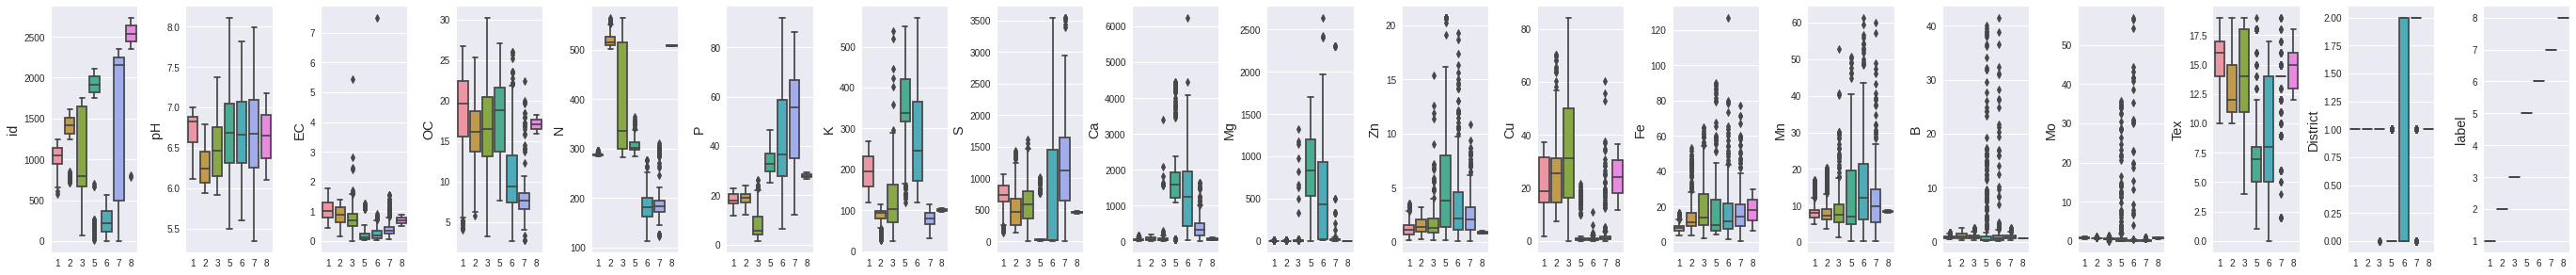

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(len(df.columns)*2,4))
for index, col in enumerate(df.columns):
    ax = axes[index]
    sns.boxplot(y=df.loc[:,col], x=df.loc[:,'label'], ax=ax)
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel("")
plt.tight_layout(pad=0.5)
plt.show()

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.District= le.fit_transform(df.District.values)

In [126]:
df.Tex= le.fit_transform(df.Tex.values)

In [127]:
X

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,7.050000,0.160000,5.560000,175.620000,38.260000,324.800000,5.210000,1884,288.000000,1.820000,0.200000,2.830000,2.800000,2
1,6.880000,0.089000,4.240000,125.440000,26.300000,103.000000,10.420000,1484,336.000000,1.620000,0.450000,6.270000,5.600000,2
2,5.600000,0.081000,2.780000,150.530000,25.700000,53.800000,7.810000,1644,504.000000,2.840000,0.440000,21.080000,24.110000,5
3,7.300000,0.164000,10.540000,188.160000,24.700000,190.400000,10.420000,1364,840.000000,7.740000,0.630000,16.420000,11.400000,2
4,7.220000,0.167000,11.410000,163.070000,40.000000,210.600000,10.420000,2004,168.000000,11.890000,0.610000,7.380000,2.910000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,6.531352,0.659126,17.283696,507.723181,28.210970,99.076266,464.099932,57,1.407825,0.908700,26.714008,20.307160,8.306451,14
2733,6.570766,0.672140,17.198919,507.854437,28.107230,99.429503,462.612618,60,1.410428,0.898288,25.791129,19.426670,8.329504,14
2734,6.989972,0.810557,16.297230,509.250472,27.003848,103.186541,446.793514,93,1.438111,0.787555,15.975375,10.061760,8.574701,16
2735,6.737222,0.727102,16.840881,508.408768,27.669104,100.921331,456.331240,73,1.421420,0.854319,21.893534,15.708094,8.426866,15


In [128]:
y

0       6
1       7
2       7
3       6
4       6
       ..
2732    8
2733    8
2734    8
2735    8
2736    8
Name: label, Length: 2737, dtype: int64

In [129]:
X = (X - X.mean())/X.std()
X

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,1.048506,-1.037491,-1.677114,-1.226424,0.557077,1.249438,-1.023138,1.526581,0.178608,-0.192447,-0.946238,-1.027180,-0.943989,-2.426073
1,0.650186,-1.200279,-1.911359,-1.594217,-0.124451,-0.593699,-1.014431,1.071609,0.288384,-0.255630,-0.931182,-0.754868,-0.599579,-2.426073
2,-2.348933,-1.218622,-2.170448,-1.410321,-0.158642,-1.002546,-1.018793,1.253598,0.672599,0.129790,-0.931784,0.417502,1.677216,-1.721297
3,1.634272,-1.028320,-0.793373,-1.134513,-0.215626,0.132587,-1.014431,0.935117,1.441030,1.677788,-0.920342,0.048613,0.113841,-2.426073
4,1.446827,-1.021441,-0.638984,-1.318409,0.656229,0.300447,-1.014431,1.663073,-0.095832,2.988847,-0.921546,-0.666999,-0.930458,-2.426073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,-0.166718,0.106901,0.403351,1.207717,-0.015557,-0.626305,-0.256227,-0.551505,-0.476827,-0.480343,0.650537,0.356323,-0.266676,0.393030
2733,-0.074369,0.136739,0.388306,1.208679,-0.021468,-0.623369,-0.258713,-0.548092,-0.476821,-0.483632,0.594957,0.286623,-0.263840,0.393030
2734,0.907857,0.454101,0.228294,1.218911,-0.084343,-0.592149,-0.285150,-0.510557,-0.476758,-0.518615,0.003815,-0.454709,-0.233680,0.862880
2735,0.315649,0.262756,0.324770,1.212742,-0.046434,-0.610972,-0.269211,-0.533306,-0.476796,-0.497523,0.360229,-0.007742,-0.251865,0.627955


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2189, 14) (548, 14) (2189,) (548,)


#Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)
# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [132]:
y_pred = classifer.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score

# accuracy
graph = accuracy_score(y_pred,y_test)
graph

1.0

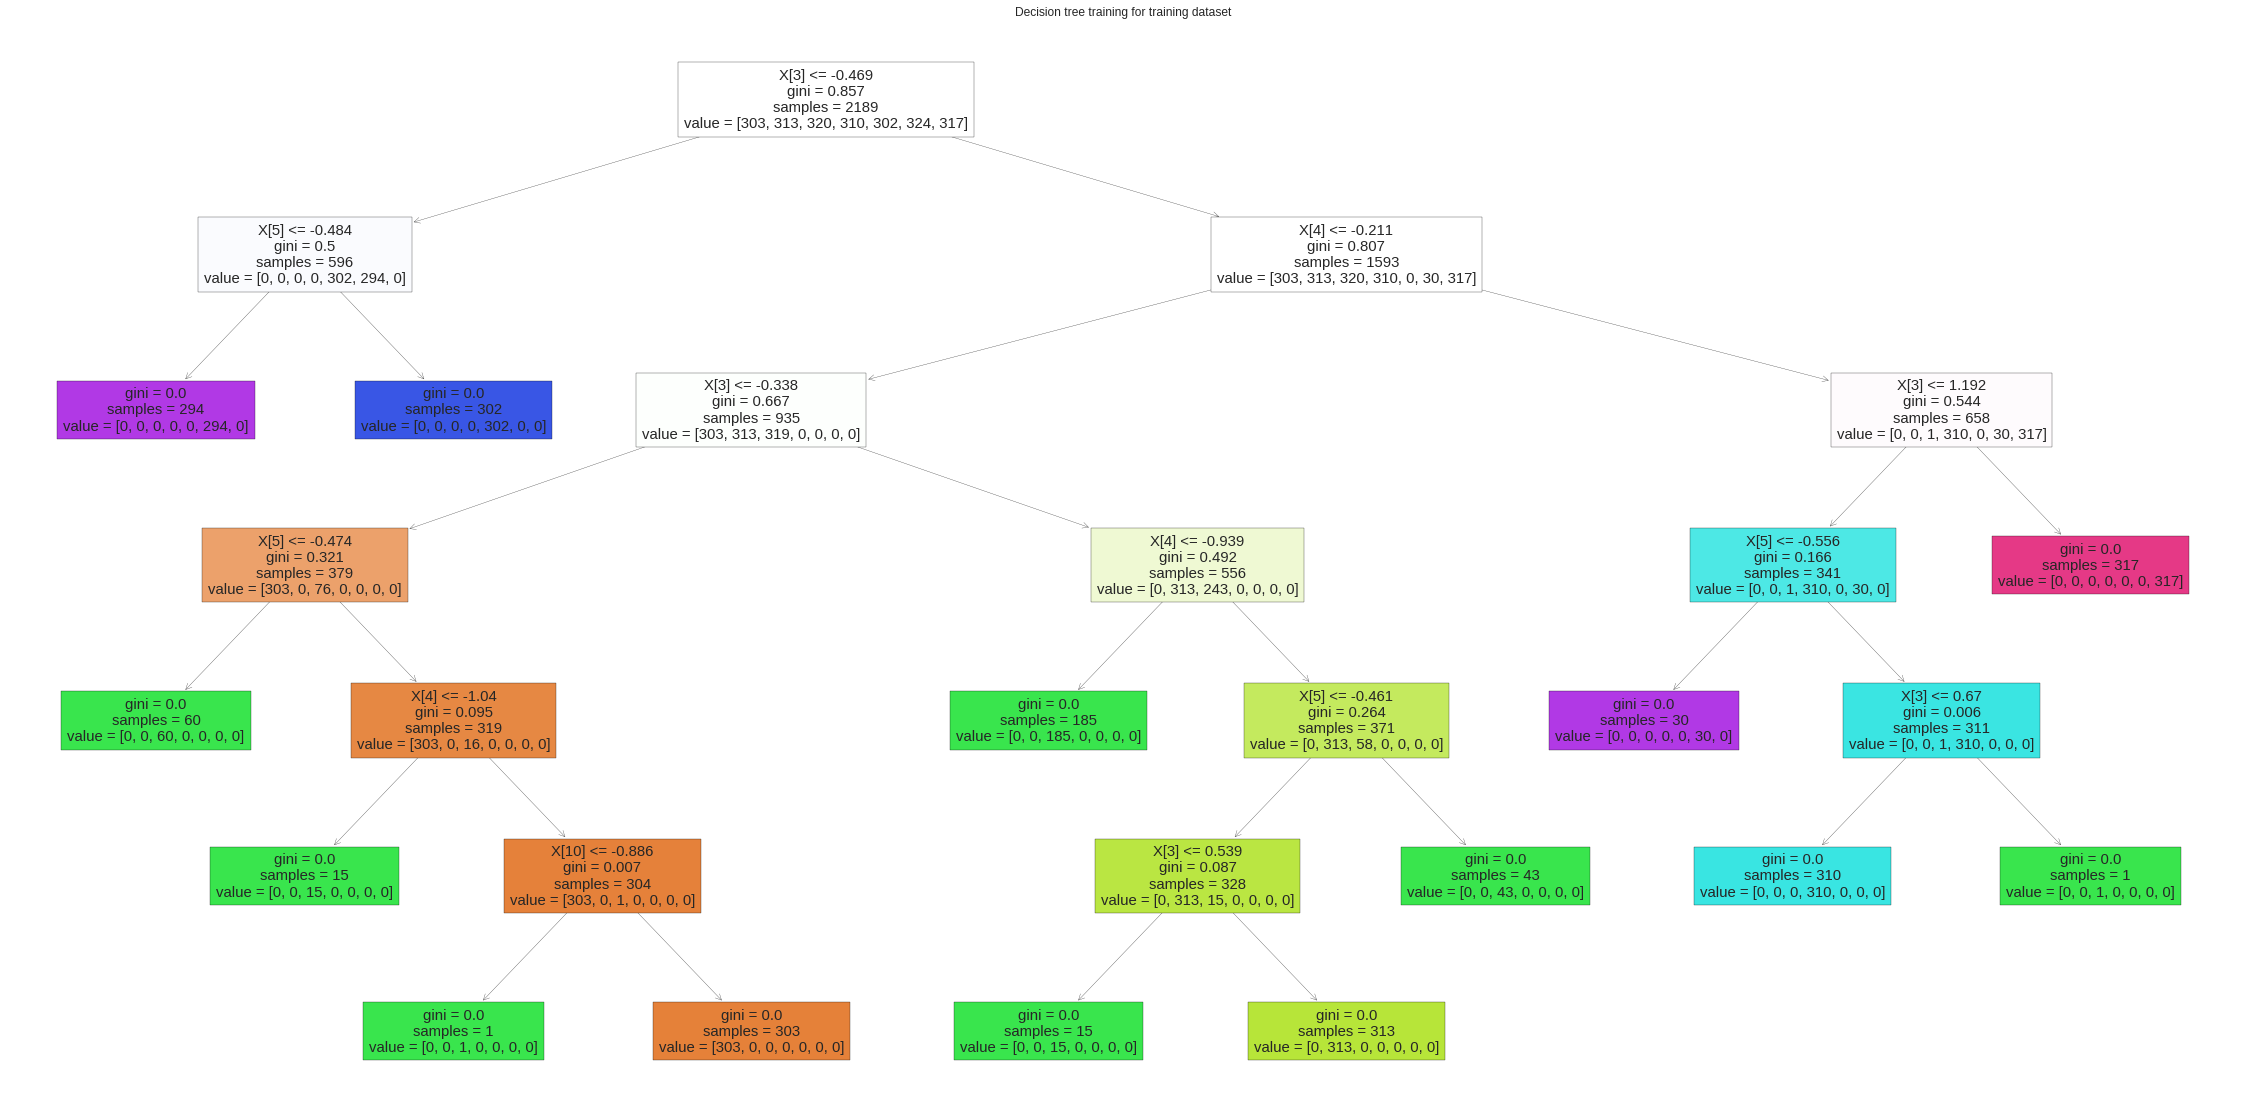

In [134]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

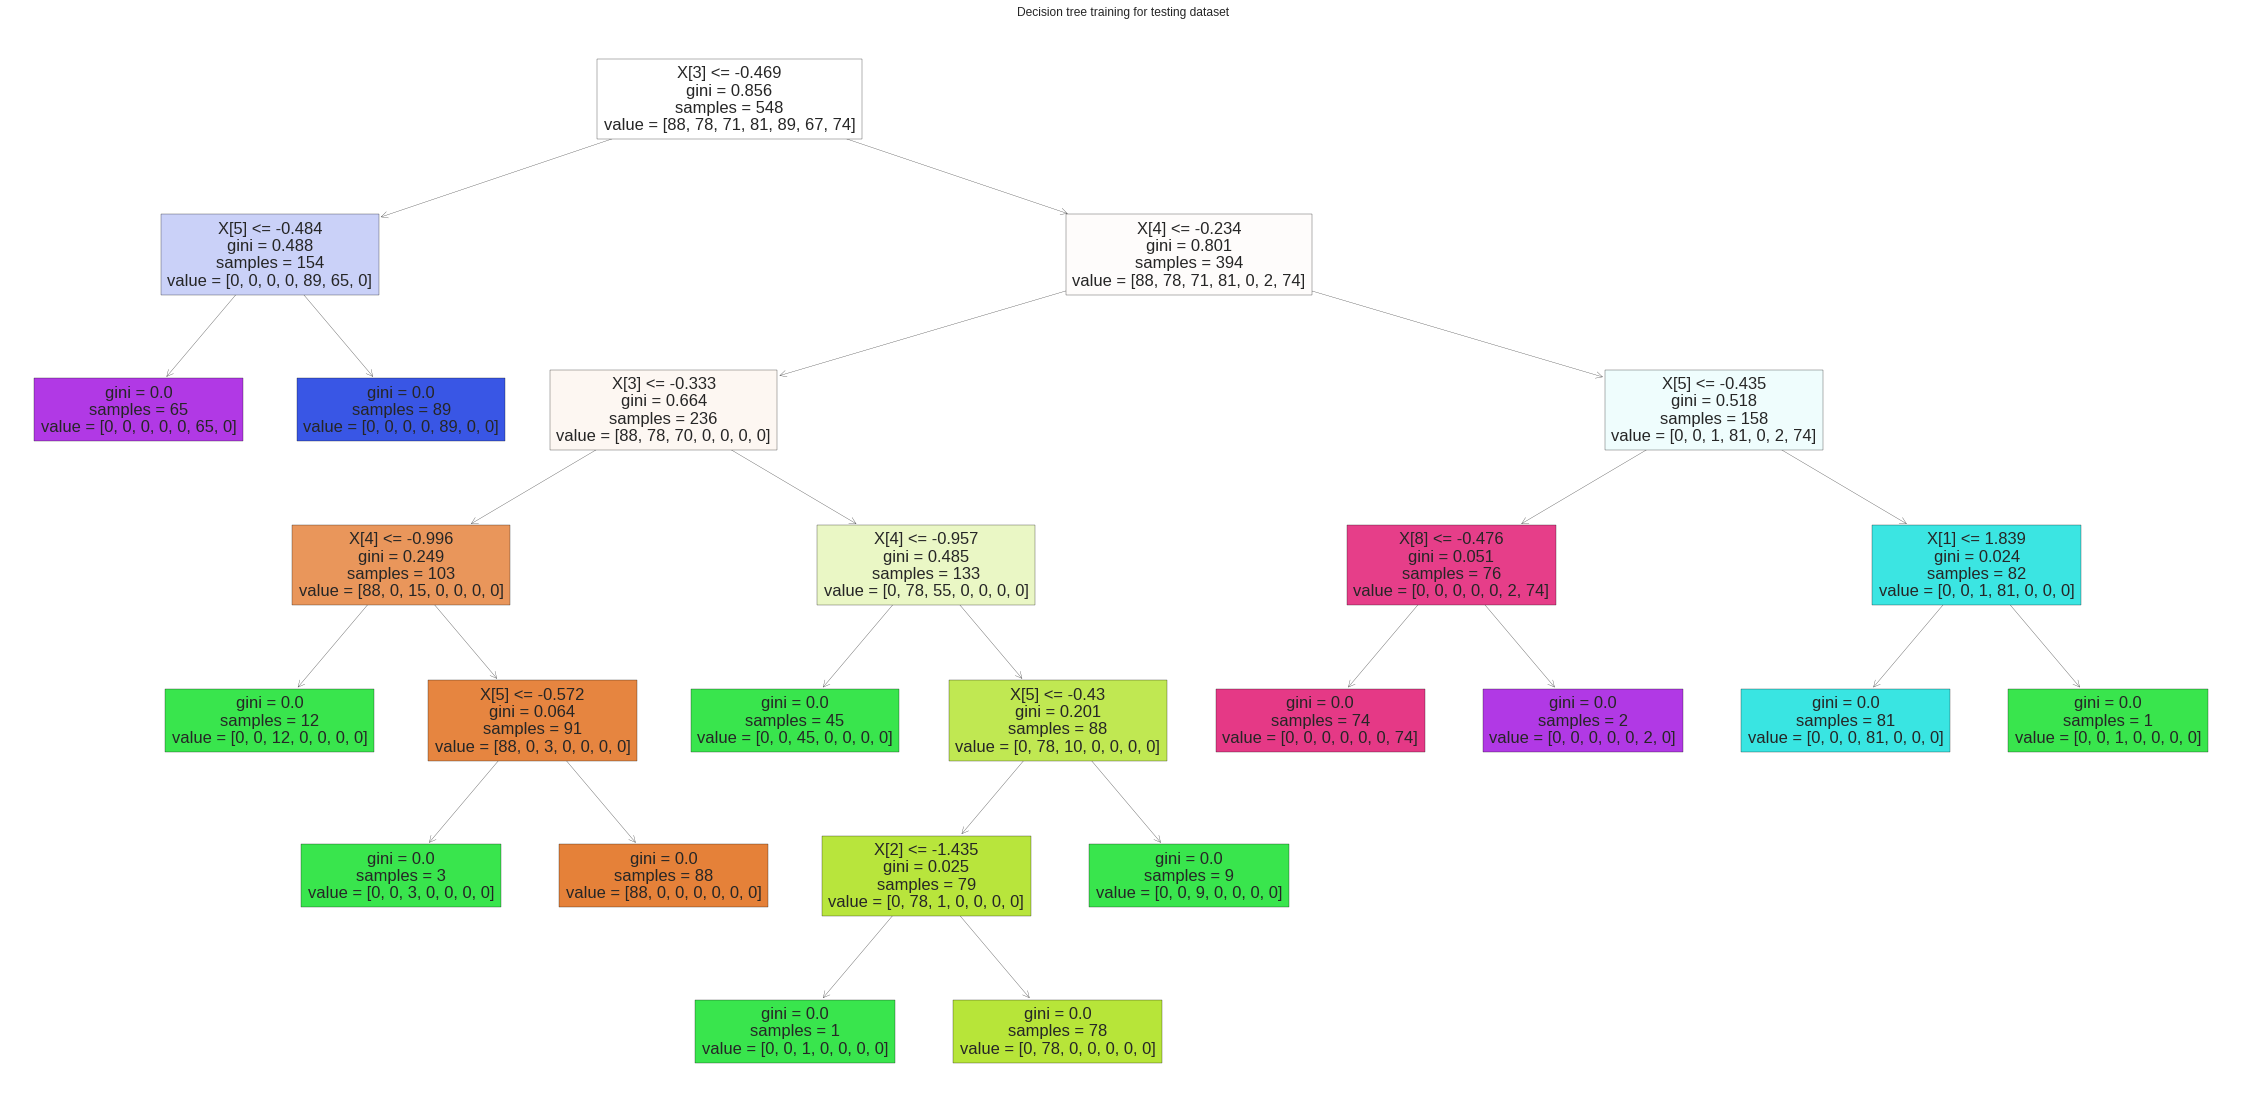

In [135]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [136]:
from sklearn import tree

# text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= -0.47
|   |--- feature_5 <= -0.48
|   |   |--- class: 7
|   |--- feature_5 >  -0.48
|   |   |--- class: 6
|--- feature_3 >  -0.47
|   |--- feature_4 <= -0.23
|   |   |--- feature_3 <= -0.33
|   |   |   |--- feature_4 <= -1.00
|   |   |   |   |--- class: 3
|   |   |   |--- feature_4 >  -1.00
|   |   |   |   |--- feature_5 <= -0.57
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_5 >  -0.57
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  -0.33
|   |   |   |--- feature_4 <= -0.96
|   |   |   |   |--- class: 3
|   |   |   |--- feature_4 >  -0.96
|   |   |   |   |--- feature_5 <= -0.43
|   |   |   |   |   |--- feature_2 <= -1.44
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_2 >  -1.44
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_5 >  -0.43
|   |   |   |   |   |--- class: 3
|   |--- feature_4 >  -0.23
|   |   |--- feature_5 <= -0.43
|   |   |   |--- feature_8 <= -0.48
|   |   |   |   |--- class: 8
|   

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        71
           5       1.00      1.00      1.00        81
           6       1.00      1.00      1.00        89
           7       1.00      1.00      1.00        67
           8       1.00      1.00      1.00        74

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



#SVM

In [138]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [139]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [140]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [141]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
graph2 = poly_accuracy*100

Accuracy (Polynomial Kernel):  93.61
F1 (Polynomial Kernel):  93.50


In [142]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  88.87
F1 (RBF Kernel):  89.23


In [143]:
print(classification_report(poly_pred, y_test))


              precision    recall  f1-score   support

           1       1.00      0.93      0.96        95
           2       0.99      0.94      0.96        82
           3       0.85      0.98      0.91        61
           5       0.96      0.95      0.96        82
           6       0.78      1.00      0.87        69
           7       1.00      0.81      0.89        83
           8       1.00      0.97      0.99        76

    accuracy                           0.94       548
   macro avg       0.94      0.94      0.93       548
weighted avg       0.95      0.94      0.94       548



#ANN Model-1

In [144]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import cv2
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf

In [145]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [146]:
import tensorflow as tf
from tensorflow import keras

In [147]:
from tensorflow.keras.layers import Flatten, Dense, InputLayer

In [347]:
hp_hidden_units = 128
hp_epoch = 20
hp_batch_size = 3
hp_lr = float(1/10)


In [348]:
l1 = Dense(30)
l2 = Dense(25, activation = tf.nn.relu)
l3 = Dense(22)
l4 = Dense(15,activation = tf.nn.relu)
l5 = Dense(10, activation = tf.nn.sigmoid)
m1 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)


In [349]:
m1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           optimizer='rmsprop',
           metrics=["accuracy"])


In [350]:
history1 =m1.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch)

Epoch 1/20
730/730 [==============================] - 2s 2ms/step - loss: 1.7577 - accuracy: 0.6080
Epoch 2/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5716 - accuracy: 0.6747
Epoch 3/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5510 - accuracy: 0.6848
Epoch 4/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5413 - accuracy: 0.6903
Epoch 5/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5348 - accuracy: 0.6916
Epoch 6/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5301 - accuracy: 0.6985
Epoch 7/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5290 - accuracy: 0.7017
Epoch 8/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5269 - accuracy: 0.7095
Epoch 9/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5266 - accuracy: 0.7131
Epoch 10/20
730/730 [==============================] - 1s 2ms/step - loss: 1.5261 - accuracy: 0.7113

In [326]:
p1 = m1.predict(X_test)

In [327]:
import numpy as np
p1_reduced = [np.argmax(pr) for pr in p1]
p1_reduced[58]


6

In [328]:
from sklearn.metrics import accuracy_score
print("Model 1: " + str(accuracy_score(p1_reduced, y_test)))
graph3= accuracy_score(p1_reduced, y_test)


Model 1: 0.36678832116788324


In [329]:
y_test[58]

3.0

In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [157]:
matrix = confusion_matrix(y_test,p1_reduced)
matrix

array([[49,  0, 39,  0,  0,  0,  0],
       [78,  0,  0,  0,  0,  0,  0],
       [58,  0, 10,  2,  0,  1,  0],
       [ 0,  0,  0, 75,  0,  6,  0],
       [ 0,  0,  0, 89,  0,  0,  0],
       [ 0,  0,  0, 66,  0,  1,  0],
       [74,  0,  0,  0,  0,  0,  0]])

In [158]:
print(classification_report(y_test,p1_reduced))


              precision    recall  f1-score   support

         1.0       0.19      0.56      0.28        88
         2.0       0.00      0.00      0.00        78
         3.0       0.20      0.14      0.17        71
         5.0       0.32      0.93      0.48        81
         6.0       0.00      0.00      0.00        89
         7.0       0.12      0.01      0.03        67
         8.0       0.00      0.00      0.00        74

    accuracy                           0.25       548
   macro avg       0.12      0.23      0.14       548
weighted avg       0.12      0.25      0.14       548



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
df.to_csv('file_name.csv', encoding='utf-8')

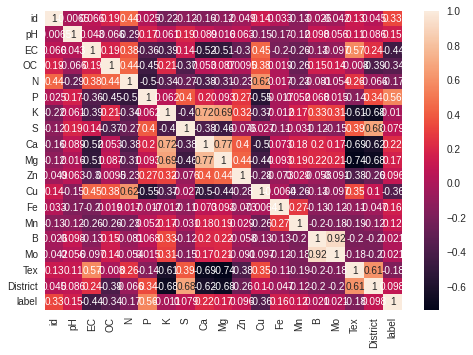

In [160]:
sns.heatmap(df.corr(),annot=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 15)                225       
                                                                 
 dense_16 (Dense)            (None, 10)                160       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 30)                330       
                                                                 
Total params: 935
Trainable params: 935
Non-trainable params: 0
_________________________________________________________________
None


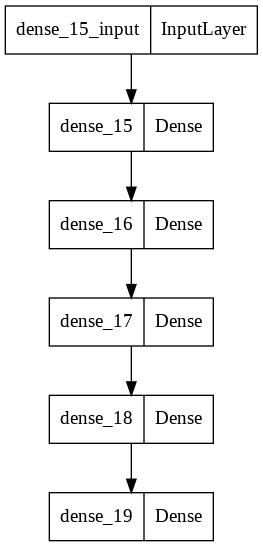

In [161]:
from tensorflow.keras.utils import plot_model
print(m1.summary())
plot_model(m1, to_file='m1.png', show_shapes=False, show_layer_names=True)

#ANN model-2

In [162]:
hp_hidden_units =20
hp_epoch = 10
hp_batch_size = 3
hp_lr = float(1/10)

In [163]:
l1 = Dense(20)
l2 = Dense(hp_hidden_units, activation = tf.nn.relu)
l3 = Dense(20, activation = tf.nn.relu)
l4 = Dense(10, activation = tf.nn.relu)
l5 = Dense(10, activation = tf.nn.softmax)
m2 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)

In [164]:
import keras
from keras.callbacks import EarlyStopping


m2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           
           optimizer='rmsprop',
           metrics=["accuracy"])

In [165]:
history2 =m2.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch, validation_split=0.2,
                 shuffle=True, verbose=1
                 
                    )

Epoch 1/10
584/584 [==============================] - 2s 2ms/step - loss: 2.1110 - accuracy: 0.3484 - val_loss: 1.9990 - val_accuracy: 0.4315
Epoch 2/10
584/584 [==============================] - 1s 2ms/step - loss: 1.8525 - accuracy: 0.6670 - val_loss: 1.7563 - val_accuracy: 0.8288
Epoch 3/10
584/584 [==============================] - 1s 2ms/step - loss: 1.6338 - accuracy: 0.8744 - val_loss: 1.5916 - val_accuracy: 0.8881
Epoch 4/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5596 - accuracy: 0.9172 - val_loss: 1.5448 - val_accuracy: 0.9406
Epoch 5/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5276 - accuracy: 0.9446 - val_loss: 1.5277 - val_accuracy: 0.9429
Epoch 6/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5124 - accuracy: 0.9566 - val_loss: 1.5206 - val_accuracy: 0.9384
Epoch 7/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5025 - accuracy: 0.9623 - val_loss: 1.5020 - val_accuracy: 0.9680
Epoch 

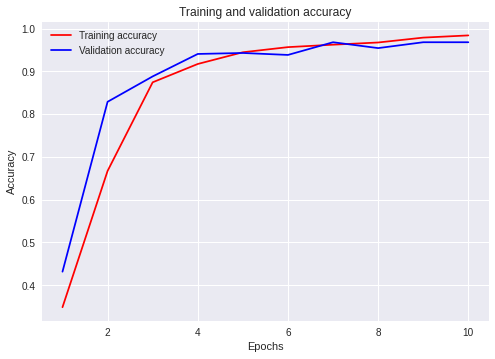

In [166]:
history_dict = history2.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

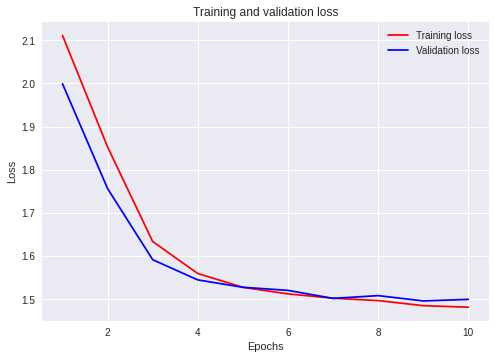

In [167]:
# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

[4.6076497e-20 4.4601862e-04 6.8895703e-19 1.1621685e-13 4.6837565e-23
 9.9752635e-01 2.0273612e-03 2.0644035e-07 6.1396312e-23 2.3519560e-21]
0.99999994
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        88
         2.0       1.00      0.94      0.97        78
         3.0       0.93      0.94      0.94        71
         5.0       0.95      1.00      0.98        81
         6.0       0.97      0.80      0.88        89
         7.0       0.82      1.00      0.90        67
         8.0       0.99      1.00      0.99        74

    accuracy                           0.95       548
   macro avg       0.95      0.95      0.95       548
weighted avg       0.96      0.95      0.95       548



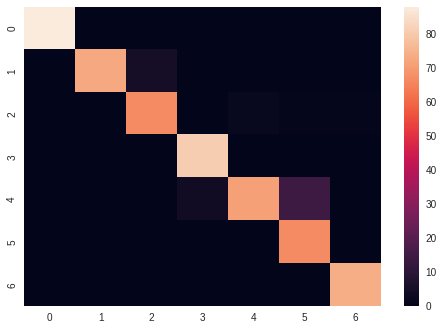

In [168]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.color_palette("Set2")
preds = m2.predict(X_test) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(y_test, preds.argmax(axis=1))
matrix
print(classification_report(y_test, preds.argmax(axis=1)))
sns.heatmap(matrix)

In [169]:
crop_name[np.argmax(preds[102])]

['Apple', 'Grape', 'Pomegranate']

In [170]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,preds.argmax(axis=1))
graph4=accuracy_score(y_test,preds.argmax(axis=1))

In [171]:
crop_name[y_test[102]]

['Apple', 'Grape', 'Pomegranate']

In [172]:
preds.argmax(axis=1)

array([5, 8, 6, 1, 8, 5, 1, 3, 6, 3, 1, 1, 6, 6, 3, 2, 8, 8, 3, 1, 2, 5,
       1, 1, 5, 6, 1, 5, 5, 2, 8, 5, 6, 3, 7, 7, 8, 6, 8, 8, 3, 1, 2, 1,
       1, 1, 7, 2, 2, 7, 6, 6, 1, 5, 3, 5, 1, 6, 6, 3, 1, 6, 7, 5, 2, 5,
       3, 5, 3, 8, 8, 2, 5, 6, 5, 2, 3, 6, 1, 5, 1, 2, 5, 8, 1, 1, 1, 5,
       5, 8, 8, 5, 6, 1, 8, 8, 2, 7, 2, 8, 6, 1, 6, 7, 3, 5, 2, 3, 7, 1,
       5, 8, 8, 3, 7, 2, 6, 1, 1, 2, 3, 7, 6, 6, 7, 5, 1, 7, 8, 8, 6, 1,
       6, 2, 8, 5, 3, 5, 1, 3, 8, 1, 2, 5, 6, 7, 8, 5, 7, 5, 6, 8, 7, 5,
       1, 7, 7, 2, 6, 3, 7, 6, 8, 3, 5, 8, 3, 1, 7, 3, 7, 2, 1, 5, 8, 8,
       7, 3, 5, 5, 7, 3, 6, 6, 3, 8, 5, 5, 7, 1, 7, 6, 3, 5, 8, 8, 2, 8,
       7, 8, 5, 6, 7, 8, 8, 2, 1, 3, 2, 6, 2, 6, 8, 2, 7, 7, 8, 1, 2, 7,
       6, 1, 3, 5, 3, 8, 1, 8, 3, 1, 8, 8, 2, 2, 8, 6, 3, 7, 7, 2, 3, 3,
       2, 5, 8, 1, 2, 1, 6, 2, 3, 8, 2, 8, 1, 6, 2, 1, 2, 5, 3, 8, 6, 6,
       2, 8, 1, 2, 3, 6, 5, 1, 8, 7, 3, 2, 1, 6, 5, 2, 3, 8, 1, 6, 7, 5,
       5, 7, 5, 6, 6, 7, 7, 5, 3, 5, 2, 6, 1, 3, 5,

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                300       
                                                                 
 dense_21 (Dense)            (None, 20)                420       
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
Total params: 1,460
Trainable params: 1,460
Non-trainable params: 0
_________________________________________________________________
None


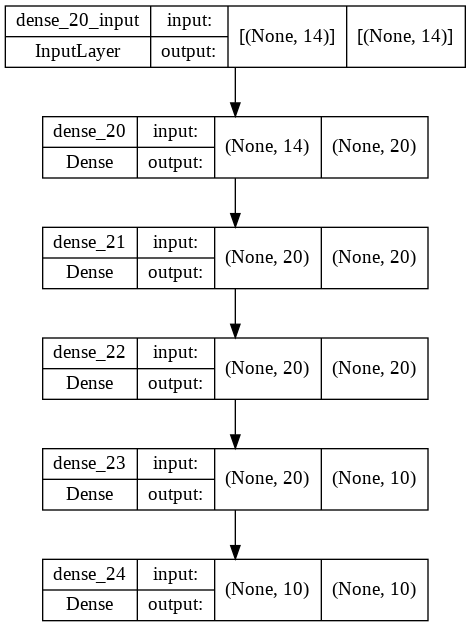

In [173]:
from tensorflow.keras.utils import plot_model
print(m2.summary())
plot_model(m2, to_file='m2.png', show_shapes=True, show_layer_names=True)

#random forest

In [174]:
labels = np.array(y)

In [175]:
features = np.array(X)

In [176]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [177]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2052, 14)
Training Labels Shape: (2052,)
Testing Features Shape: (685, 14)
Testing Labels Shape: (685,)


In [178]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [179]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [180]:
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
graph5= round(accuracy, 2)

Accuracy: 99.78 %.


In [181]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [182]:

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

#xgboost


In [183]:
!pip3 install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [184]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [185]:
modelXG = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [186]:
modelXG.fit(X_train, y_train)


XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [187]:
y_predxg = modelXG.predict(X_test)


In [188]:
graph6 = accuracy_score(y_test, y_predxg)
accuracy

99.78491484184914

In [189]:
print(classification_report(y_test,y_predxg))


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        88
         2.0       1.00      1.00      1.00        78
         3.0       1.00      0.99      0.99        71
         5.0       0.99      1.00      0.99        81
         6.0       1.00      1.00      1.00        89
         7.0       1.00      1.00      1.00        67
         8.0       1.00      1.00      1.00        74

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



In [196]:
acc_list=[graph,graph2,graph3,graph4,graph5,graph6]

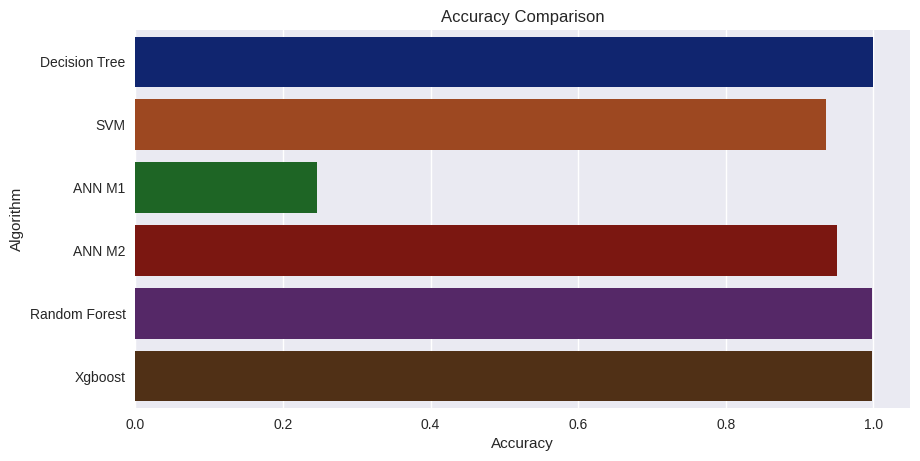

In [206]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc_list,y = index,palette='dark')

In [193]:
graph

1.0

In [194]:
graph2=graph2/100

In [195]:
graph5=graph5/100


In [198]:
acc_list

[1.0,
 0.9361313868613139,
 0.24635036496350365,
 0.9507299270072993,
 0.9978,
 0.9981751824817519]

In [200]:
index= ['Decision Tree',"SVM","ANN M1","ANN M2","Random Forest","Xgboost"]

In [202]:
precison_list= [0.99,0.94,0.12,0.95,0.98,0.99]

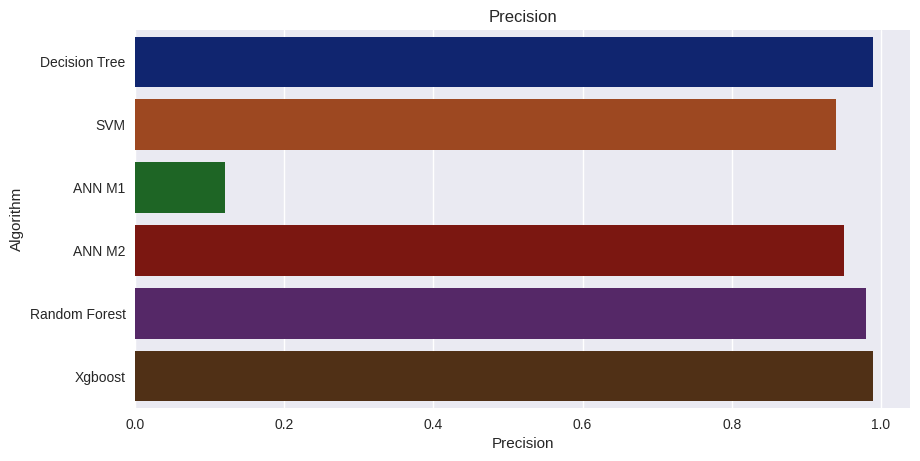

In [204]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Precision')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
sns.barplot(x = precison_list,y = index,palette='dark')

#prediction function

In [208]:
my = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]

In [211]:
ph = 5.6
ec = 0.12
oc = 8.46
n = 190.2
p = 20.42
k = 268.2
s = 9.4
ca = 1322
mg = 400
zn = 1.42
cu = 0.21
fe = 15.6
mn = 16.5
tex = 5

lst = [[ph, ec, oc, n, p, k, s, ca, mg, zn, cu, fe, mn, tex]]
arr = np.array(lst)
mean = np.array(my.mean())
std = np.array(my.std())
arr = (arr-mean)/std

In [218]:
pred = m2.predict(arr)
pred.argmax(axis=1)[0]
print(crop_name[pred.argmax(axis=1)[0]])

['Apple', 'Grape', 'Pomegranate']


#District Prediction

In [278]:
X1 = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]
Y1 = df[['District']]

In [279]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y1.District= le.fit_transform(df.District.values)
X1.Tex= le.fit_transform(df.Tex.values)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [223]:
X1

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,7.050000,0.160000,5.560000,175.620000,38.260000,324.800000,5.210000,1884,288.000000,1.820000,0.200000,2.830000,2.800000,2
1,6.880000,0.089000,4.240000,125.440000,26.300000,103.000000,10.420000,1484,336.000000,1.620000,0.450000,6.270000,5.600000,2
2,5.600000,0.081000,2.780000,150.530000,25.700000,53.800000,7.810000,1644,504.000000,2.840000,0.440000,21.080000,24.110000,5
3,7.300000,0.164000,10.540000,188.160000,24.700000,190.400000,10.420000,1364,840.000000,7.740000,0.630000,16.420000,11.400000,2
4,7.220000,0.167000,11.410000,163.070000,40.000000,210.600000,10.420000,2004,168.000000,11.890000,0.610000,7.380000,2.910000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,6.531352,0.659126,17.283696,507.723181,28.210970,99.076266,464.099932,57,1.407825,0.908700,26.714008,20.307160,8.306451,14
2733,6.570766,0.672140,17.198919,507.854437,28.107230,99.429503,462.612618,60,1.410428,0.898288,25.791129,19.426670,8.329504,14
2734,6.989972,0.810557,16.297230,509.250472,27.003848,103.186541,446.793514,93,1.438111,0.787555,15.975375,10.061760,8.574701,16
2735,6.737222,0.727102,16.840881,508.408768,27.669104,100.921331,456.331240,73,1.421420,0.854319,21.893534,15.708094,8.426866,15


In [284]:
Y1['District'].unique()

array([0, 2, 1])

In [285]:
X1 = (X1 - X1.mean())/X1.std()
X1

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,1.048506,-1.037491,-1.677114,-1.226424,0.557077,1.249438,-1.023138,1.526581,0.178608,-0.192447,-0.946238,-1.027180,-0.943989,-2.426073
1,0.650186,-1.200279,-1.911359,-1.594217,-0.124451,-0.593699,-1.014431,1.071609,0.288384,-0.255630,-0.931182,-0.754868,-0.599579,-2.426073
2,-2.348933,-1.218622,-2.170448,-1.410321,-0.158642,-1.002546,-1.018793,1.253598,0.672599,0.129790,-0.931784,0.417502,1.677216,-1.721297
3,1.634272,-1.028320,-0.793373,-1.134513,-0.215626,0.132587,-1.014431,0.935117,1.441030,1.677788,-0.920342,0.048613,0.113841,-2.426073
4,1.446827,-1.021441,-0.638984,-1.318409,0.656229,0.300447,-1.014431,1.663073,-0.095832,2.988847,-0.921546,-0.666999,-0.930458,-2.426073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,-0.166718,0.106901,0.403351,1.207717,-0.015557,-0.626305,-0.256227,-0.551505,-0.476827,-0.480343,0.650537,0.356323,-0.266676,0.393030
2733,-0.074369,0.136739,0.388306,1.208679,-0.021468,-0.623369,-0.258713,-0.548092,-0.476821,-0.483632,0.594957,0.286623,-0.263840,0.393030
2734,0.907857,0.454101,0.228294,1.218911,-0.084343,-0.592149,-0.285150,-0.510557,-0.476758,-0.518615,0.003815,-0.454709,-0.233680,0.862880
2735,0.315649,0.262756,0.324770,1.212742,-0.046434,-0.610972,-0.269211,-0.533306,-0.476796,-0.497523,0.360229,-0.007742,-0.251865,0.627955


In [286]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(2189, 14) (548, 14) (2189, 1) (548, 1)


In [287]:
X1_train = np.asarray(X1_train).astype(np.float32)

X1_test = np.asarray(X1_test).astype(np.float32)


In [288]:
hp_hidden_units = 45
hp_epoch = 10
hp_batch_size = 3
hp_lr = float(1/10)

In [289]:
l1 = Dense(40)
l2 = Dense(35, activation = tf.nn.relu)
l3 = Dense(20)
l4 = Dense(10, activation = tf.nn.softmax)
d = keras.models.Sequential(
    [l1, l2, l3, l4]
)


In [290]:
from tensorflow.keras.layers import Flatten, Dense, InputLayer

In [291]:
d.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           optimizer='adam',
           metrics=["accuracy"])


In [302]:
history3 =d.fit(X1_train, y1_train, batch_size= 10, epochs=3)

Epoch 1/3
219/219 [==============================] - 1s 3ms/step - loss: 1.4732 - accuracy: 0.9881
Epoch 2/3
219/219 [==============================] - 1s 3ms/step - loss: 1.4731 - accuracy: 0.9881
Epoch 3/3
219/219 [==============================] - 1s 4ms/step - loss: 1.4731 - accuracy: 0.9881


In [303]:
districts = { 0 : ["Almora"], 1 : ["Tehri"], 2 : ["Chamoli"]}

In [304]:
predsd = d.predict(X1_test)

In [307]:
districts[np.argmax(predsd[50])]

['Chamoli']

#Fertility Scale

In [308]:
n = 0
p = 0
k = 0
s = 0
oc = 0
ca = 0
score = 0

label = []

In [310]:
for i in range(df.shape[0]):
    if(df.loc[i]['N']<=280):
        n=1
    elif(df.loc[i]['N']>280 and df.loc[i]['N']<=560):
        n=2
    elif(df.loc[i]['N']>560):
        n=3
        
        
    
    if(df.loc[i]['P']<=10):
        p=1
    elif(df.loc[i]['P']>10 and df.loc[i]['P']<=24.6):
        p=2
    elif(df.loc[i]['P']>24.6):
        p=3
        
        
        
    if(df.loc[i]['K']<=117.6):
        k=1
    elif(df.loc[i]['K']>117.6 and df.loc[i]['K']<=280):
        k=2
    elif(df.loc[i]['K']>280):
        k=3
        
    if(df.loc[i]['S']<=10):
        s=1
    elif(df.loc[i]['S']>10 and df.loc[i]['S']<=20):
        s=2
    elif(df.loc[i]['S']>20):
        s=3
        
    if(df.loc[i]['OC']<=0.5):
        oc=3
    elif(df.loc[i]['OC']>0.5 and df.loc[i]['OC']<=0.75):
        oc=6
    elif(df.loc[i]['OC']>0.75):
        oc=9
        
    if(df.loc[i]['Ca']<=2500):
        ca=1
    elif(df.loc[i]['Ca']>2500 and df.loc[i]['Ca']<=4000):
        ca=2
    elif(df.loc[i]['Ca']>4000):
        ca=3   
        
    score = ((n+p+k+s+oc+ca)*10)/28.35
    
    
    label.append((score))

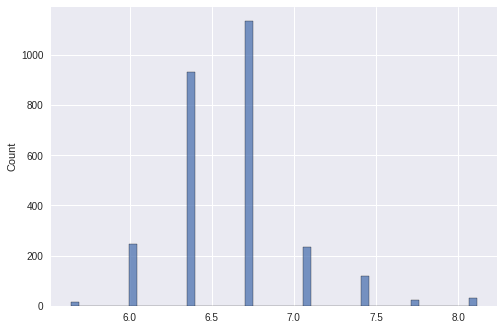

In [315]:
sns.histplot(label)